# Non-Linear Regression

In [1]:
# load libraries

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR

In [2]:
df = pd.read_csv('insurance_claims.csv')

In [3]:
df.columns

Index(['CustomerID', 'State', 'ClaimAmount', 'Education', 'Income', 'Gender',
       'Policy', 'NumberOfPolicies', 'PolicyType', 'MonthsInstallment',
       'VehicleType', 'TotalClaimAmount'],
      dtype='object')

In [4]:
df.head()

,CustomerID,State,ClaimAmount,Education,Income,Gender,Policy,NumberOfPolicies,PolicyType,MonthsInstallment,VehicleType,TotalClaimAmount
0,CID311,IA,59,High School,196419,M,Auto,4,Business,70,MUV,112.09
1,CID838,PH,71,Professional,171186,F,Auto,4,Business,31,Medium sized,113.47
2,CID607,PH,103,Graduate,285004,F,Auto,4,Self Auto,67,Sedan,113.86
3,CID436,TX,103,Professional,181780,M,Auto,4,Corporate Auto,78,Medium sized,114.16
4,CID018,PH,112,College,275022,F,Auto,3,Self Auto,21,Medium sized,116.19


In [5]:
df.describe(include='all')

,CustomerID,State,ClaimAmount,Education,Income,Gender,Policy,NumberOfPolicies,PolicyType,MonthsInstallment,VehicleType,TotalClaimAmount
count,1000,1000,1000.000000,1000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000.000000
unique,1000,5,NaN,5,NaN,2,1,NaN,5,NaN,4,NaN
top,CID228,TX,NaN,Professional,NaN,M,Auto,NaN,Self Auto,NaN,Medium sized,NaN
freq,1,222,NaN,224,NaN,513,1000,NaN,274,NaN,270,NaN
mean,NaN,NaN,4973.940000,NaN,154488.310000,NaN,NaN,2.544000,NaN,48.376000,NaN,5915.439893
std,NaN,NaN,2765.799312,NaN,86622.613704,NaN,NaN,1.115934,NaN,27.776396,NaN,4870.864260
min,NaN,NaN,59.000000,NaN,681.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,0.000000
25%,NaN,NaN,2700.500000,NaN,80608.750000,NaN,NaN,2.000000,NaN,25.000000,NaN,2282.432500
50%,NaN,NaN,4962.500000,NaN,156377.500000,NaN,NaN,3.000000,NaN,48.000000,NaN,4398.613500
75%,NaN,NaN,7217.000000,NaN,231740.250000,NaN,NaN,4.000000,NaN,72.000000,NaN,7688.697500


In [6]:
cont_col_dict, cat_col_dict, unk_col_dict = {}, {}, {}

for item in df.dtypes.items():
    col_type = str(item[1])
    if 'int' in col_type or 'float' in col_type:
        cont_col_dict[item[0]] = col_type
    elif 'object' in col_type:
        cat_col_dict[item[0]] = col_type
    else:
        unk_col_dict[item[0]] = col_type

cat_cols = [x for x in cat_col_dict.keys()]
con_cols = [x for x in cont_col_dict.keys()]
unk_cols = [x for x in unk_col_dict.keys()]

cat_cols, con_cols, unk_cols

(['CustomerID',
  'State',
  'Education',
  'Gender',
  'Policy',
  'PolicyType',
  'VehicleType'],
 ['ClaimAmount',
  'Income',
  'NumberOfPolicies',
  'MonthsInstallment',
  'TotalClaimAmount'],
 [])

In [7]:
df['ClaimAmount'].mean()

4973.94

In [8]:
df['TotalClaimAmount'].mean()

5915.439892999998

### Feature engineering

In [9]:
X = df['ClaimAmount'].values
X.shape

(1000,)

In [10]:
y = df['TotalClaimAmount'].values
y.shape

(1000,)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [12]:
X_train.shape, X_test.shape

((750,), (250,))

In [13]:
y_train.shape, y_test.shape

((750,), (250,))

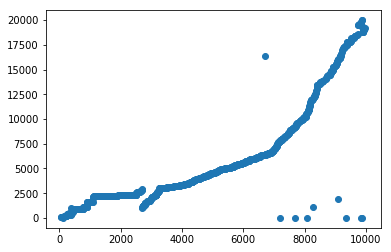

In [14]:
plt.scatter(X,y)

In [15]:
X_train = X_train.reshape(-1,1)
X_train.shape

(750, 1)

In [16]:
X_test = X_test.reshape(-1,1)
X_test.shape

(250, 1)

### Statsmodels

In [17]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

E:\Python\Anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     8912.
Date:                Wed, 15 Aug 2018   Prob (F-statistic):               0.00
Time:                        19:43:43   Log-Likelihood:                -9215.6
No. Observations:                1000   AIC:                         1.843e+04
Df Residuals:                     999   BIC:                         1.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.2767      0.014     94.401      0.000       1.250       1.303
==============================================================================
Omnibus:                      181.254   Durbin-Watson:                   0.584
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              792.802
Skew:                           0.780   Prob(JB):                    7.00e-173
Kurtosis:                       7.073   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Cross Validation

In [18]:
model = LinearRegression()
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
y_pred = model.predict(X_test)

In [21]:
# The coefficients
print('Coefficients: \n', model.coef_)

# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('R2 score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [1.52523091]
Mean squared error: 4452094.67
R2 score: 0.83


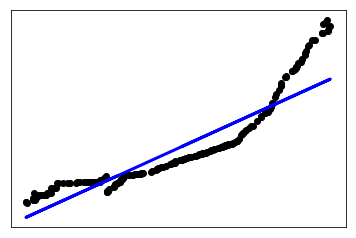

In [22]:
# Plot outputs
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
#plt.legend()
plt.xticks(())
plt.yticks(())

plt.show()

### Conclusion

##### R2 score = 0.83 

In [23]:
cv_results = cross_validate(model, X.reshape(-1,1), y, 
                            return_train_score=True, )

In [24]:
sorted(cv_results.keys())

['fit_time', 'score_time', 'test_score', 'train_score']

In [25]:
cv_results['test_score']

array([-44.90924126,  -4.1201334 ,  -0.63254258])

In [26]:
print(cv_results['train_score'])

[0.79866364 0.82172931 0.93216823]


### Polynomial 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
X_train = X_train.reshape(-1,1)
X_train.shape

(750, 1)

In [29]:
X_test = X_test.reshape(-1,1)
X_test.shape

(250, 1)

In [30]:
y_train.shape, y_test.shape

((750,), (250,))

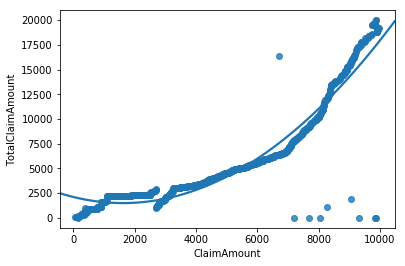

In [31]:
sns.regplot(data=df, x='ClaimAmount', y='TotalClaimAmount', 
            order=2, fit_reg=True, ci=None)

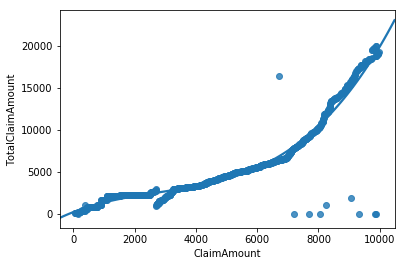

In [32]:
sns.regplot(data=df, x='ClaimAmount', y='TotalClaimAmount', 
            order=3, fit_reg=True, ci=None)

### SVR RBF Kernel

In [33]:
model = SVR(kernel='rbf', C=1000, gamma=0.01)
model

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [34]:
model.fit(X_train, y_train)

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [35]:
y_pred = model.predict(X_test)

In [36]:
lw = 2

In [37]:
X.shape, y.shape

((1000,), (1000,))

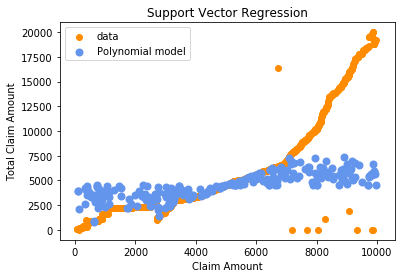

In [38]:
# Look at the results

plt.scatter(X, y, color='darkorange', label='data')
plt.scatter(X_test, y_pred, color='cornflowerblue', lw=lw, label='Polynomial model')
plt.xlabel('Claim Amount')
plt.ylabel('Total Claim Amount')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

### Observation

1. Few of the outliers are pulling the predictions down
2. Remove the outliers and retrain 